# Context:

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data.
This is a transactional data set that contains all the transactions occurring in online retail.
Ecommerce data is information relating to the visitors and performance of an online shop. It's mostly used by marketers e.g. in understanding consumer behavior and enhancing conversion funnels.

# Objective:

The objective is to find out the features which have the most information context to differentiate the positive class and negative class and also build a model to predict whether a customer will buy a product or not.

# Dataset

The data contains information on web sessions of a customer:

--------------------------------------
- **"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"**: These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.
--------------------------------------
- The **"Bounce Rate", "Exit Rate" and "Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- **Bounce Rate:** The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

- **Exit Rate:** The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

- Dataset has average bounce rates and exit rates for a page customer landed on.

Read more about **Bounce Rate** vs **Exit Rate** [here](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780)
- **Page Value:** The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

Read more about **Page Value** [here](https://support.google.com/analytics/answer/2695658?hl=en).

--------------------------------------
- **Special Day:** The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction.
- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
- For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
--------------------------------------
- The dataset also includes the operating system, browser, region, traffic type - these values are masked.

- VisitorType: returning visitor, new visitor, or other types of customer.
- weekend: a Boolean value indicating whether the date of the visit is weekend or not
- month: month of the year

### Import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
import sklearn


### Read the dataset

In [3]:
# shoppers = pd.read_csv('online_shoppers_intention.csv')

from google.colab import drive
drive.mount('/content/drive')

shoppers = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Logistic_NB/Naive_Bayes/online_shoppers_intention.csv")



Mounted at /content/drive


In [4]:
# copying data to another varaible to avoid any changes to original data
data=shoppers.copy()

### View the first and last 10 rows of the dataset.

In [5]:
data.tail(10)

Administrative  Administrative_Duration  Informational  \
12320               0                     0.00              0   
12321               0                     0.00              0   
12322               6                    76.25              0   
12323               2                    64.75              0   
12324               0                     0.00              1   
12325               3                   145.00              0   
12326               0                     0.00              0   
12327               0                     0.00              0   
12328               4                    75.00              0   
12329               0                     0.00              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12320                     0.0               8               143.583333   
12321                     0.0               6                 0.000000   
12322                     0.0              22              1075.250000   
12323                     0.0              44              1157.976190   
12324                     0.0              16               503.000000   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12320     0.014286   0.050000    0.000000         0.0   Nov                 2   
12321     0.200000   0.200000    0.000000         0.0   Nov                 1   
12322     0.000000   0.004167    0.000000         0.0   Dec                 2   
12323     0.000000   0.013953    0.000000         0.0   Nov                 2   
12324     0.000000   0.037647    0.000000         0.0   Nov                 2   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
12320        2       3            1  Returning_Visitor    False    False  
12321        8       4            1  Returning_Visitor    False    False  
12322        2       4            2  Returning_Visitor    False    False  
12323        2       1           10  Returning_Visitor    False    False  
12324        2       1            1  Returning_Visitor    False    False  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False

### Understand the shape of the dataset.

In [6]:
data.shape

(12330, 18)

* Dataset has 12330 rows and 18 columns

### Let's check the duplicate data. And if any, we should remove it.

In [7]:
data[data.duplicated()].count()

Administrative             125
Administrative_Duration    125
Informational              125
Informational_Duration     125
ProductRelated             125
ProductRelated_Duration    125
BounceRates                125
ExitRates                  125
PageValues                 125
SpecialDay                 125
Month                      125
OperatingSystems           125
Browser                    125
Region                     125
TrafficType                125
VisitorType                125
Weekend                    125
Revenue                    125
dtype: int64

### Let's drop the duplicate values. As we can see from above that 125 are duplicates.

In [8]:
data.drop_duplicates(inplace=True)


### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

### Insights:

- Most of the data-types are either **int64** or **float64**.
- 2 columns - Month and VisitorType are having data-types as an **object**, this means we need to convert these into suitable data-type before we feed our data into the model.
- The last two columns: "Weekend" and "Revenue", have the data-type as a **bool**.

### Think about it:

- We already know that we convert the categorical data-types into suitable form using either the "LabelEncoder" or "OneHotEncoding".
- But here we have a **bool** data type. What should we do here?
- In Python, True and False are cast implicitly into integers:

    `True == 1`
    
    `False == 0`
    
    This means that an algorithm running in pure Python should work without conversion.

### Fixing the data types
* Month and VisitorType are of an object type, we can change them to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [10]:
data["Month"] = data["Month"].astype("category")
data["VisitorType"] = data["VisitorType"].astype("category")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  float64 
 10  Month                    12205 non-null  category
 11  OperatingSystems         12205 non-null  int64   
 12  Browser                  12205 non-null  int64   
 13  Region                   12205 non-null  int64   
 14  Traffi

* Month and VisitorType have been converted to categories.

`we can see that the memory usage has decreased from 1.6+ MB to 1.4 MB`

### Check for missing values

In [12]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

* There are no missing values in the data.

### Give a statistical summary for the dataset.

In [13]:
data.describe().T

count         mean          std  min         25%  \
Administrative           12205.0     2.338878     3.330436  0.0    0.000000   
Administrative_Duration  12205.0    81.646331   177.491845  0.0    0.000000   
Informational            12205.0     0.508726     1.275617  0.0    0.000000   
Informational_Duration   12205.0    34.825454   141.424807  0.0    0.000000   
ProductRelated           12205.0    32.045637    44.593649  0.0    8.000000   
ProductRelated_Duration  12205.0  1206.982457  1919.601400  0.0  193.000000   
BounceRates              12205.0     0.020370     0.045255  0.0    0.000000   
ExitRates                12205.0     0.041466     0.046163  0.0    0.014231   
PageValues               12205.0     5.949574    18.653671  0.0    0.000000   
SpecialDay               12205.0     0.061942     0.199666  0.0    0.000000   
OperatingSystems         12205.0     2.124211     0.906823  1.0    2.000000   
Browser                  12205.0     2.357804     1.710114  1.0    2.000000   
Region                   12205.0     3.153298     2.402340  1.0    1.000000   
TrafficType              12205.0     4.073904     4.016654  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    9.000000    94.700000   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  608.942857  1477.154762  63973.522230  
BounceRates                0.002899     0.016667      0.200000  
ExitRates                  0.025000     0.048529      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

* All the numerical variables seem to be right-skewed.
* Most time spent by customers is on the ProductRelated pages.
* There are some customers who haven't visited the administrative page and informational pages.

In [14]:
data.describe(include=['category','bool'])

Month        VisitorType Weekend Revenue
count   12205              12205   12205   12205
unique     10                  3       2       2
top       May  Returning_Visitor   False   False
freq     3329              10431    9346   10297

In [15]:
data['Month'].unique()

['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (10, object): ['Aug', 'Dec', 'Feb', 'Jul', ..., 'May', 'Nov', 'Oct', 'Sep']

In [16]:
data['VisitorType'].unique()

['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['New_Visitor', 'Other', 'Returning_Visitor']

In [17]:
data['Weekend'].unique()

array([False,  True])

In [18]:
data['Revenue'].unique()

array([False,  True])

* Data is of 10 months January and April's data is not available with us.
* In may the website had the most active customers.
* Most of the customers are returning type customers which is a good thing for the business.
* Most traffic on the website is generally on the weekdays.
* Website is only able to generate revenue from a small portion of customers.

### EDA

### Univariate analysis

In [19]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet',orient='h') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Administrative_Duration

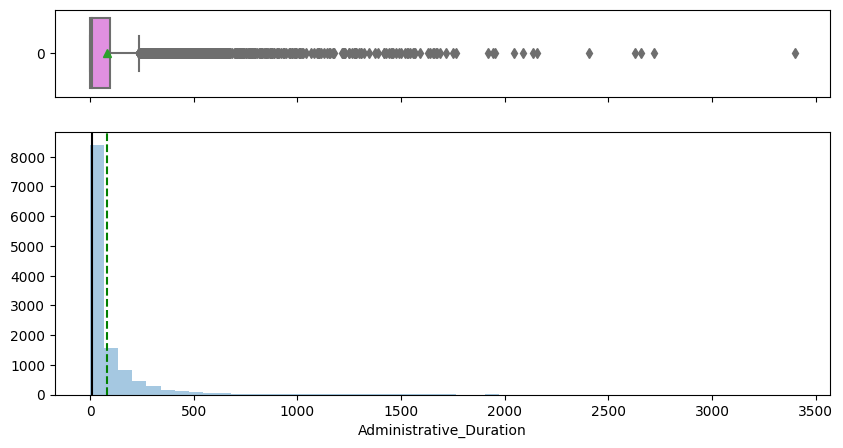

In [20]:
histogram_boxplot(data["Administrative_Duration"])

* The distribution of Administrative_Duration is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 94 which means 75% of customers stay less than 94 seconds on Administrative pages in a session.

### Observations on Informational

In [21]:
histogram_boxplot(data["Informational"])

* The distribution of Informational is right-skewed.
* There are outliers in this variable.
* Very few customers have visited the informational page.

### Observations on Informational_Duration

In [22]:
histogram_boxplot(data["Informational_Duration"])

* The distribution of Informational_Duration is right-skewed.
* There are outliers in this variable.
* On average customers have spent 35 seconds on the informational page.

### Observations on ProductRelated

In [23]:
histogram_boxplot(data["ProductRelated"])

* The distribution of ProductRelated is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 38 which means 75% of customers have visited less than 38 pages and on average a customer visits 32 pages.

### Observations on ProductRelated_Duration

In [24]:
histogram_boxplot(data["ProductRelated_Duration"])

* The distribution of ProductRelated_Duration is right-skewed.
* There are outliers in this variable.
* On average customers have spent 1206 seconds (~20 minutes) on the ProductRelated page which is way more than the administrative page and informational page.

### Observations on BounceRates

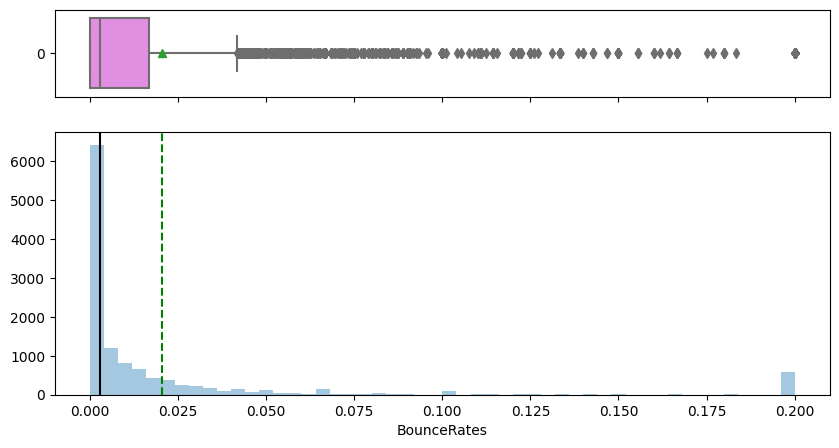

In [25]:
histogram_boxplot(data["BounceRates"])

* The distribution of BounceRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.022.

### Observations on ExitRates

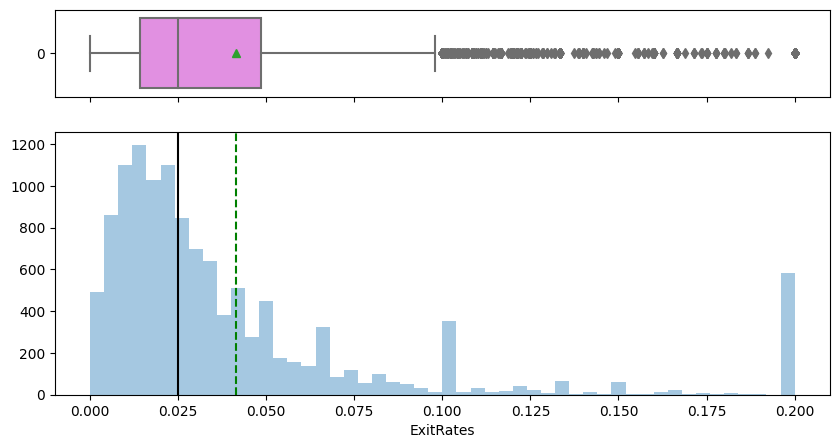

In [26]:
histogram_boxplot(data["ExitRates"])

* The distribution of ExitRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.041.

### Observations on PageValues

In [27]:
histogram_boxplot(data["PageValues"])

* The distribution of PageValues is right-skewed.
* There are outliers in this variable.
* On average the customers visit 6 pages before finally landing on the transaction page.

### Observations on SpecialDay

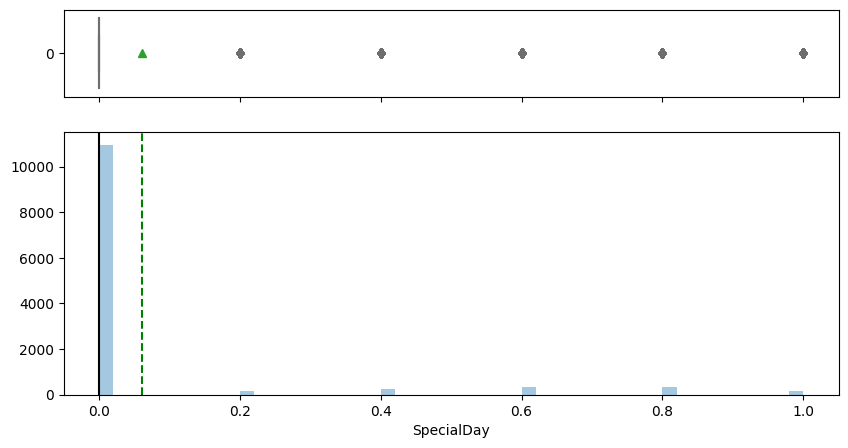

In [28]:
histogram_boxplot(data["SpecialDay"])

* The distribution of SpecialDays suggests that most customers have visited the website on days which were not close to a special occasion.
* The distribution of SpecialDays also suggests we should look at it as a category to extract more information.

### Observations on OperatingSystems

In [29]:
histogram_boxplot(data["OperatingSystems"])

* The distribution of Operating systems shows most of the customers accessed the website using 2nd operating system.
* These values are masked so it is difficult to comment on it.
* The distribution of Operating systems also suggests we should look at it as a category to extract more information.

### Observations on Browser

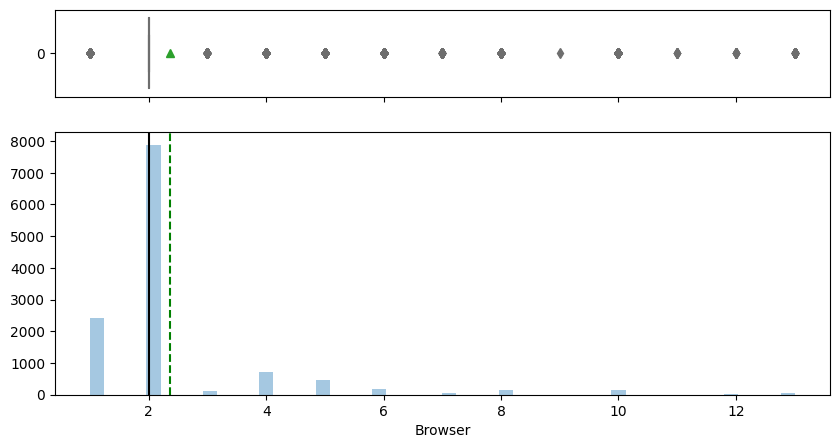

In [30]:
histogram_boxplot(data["Browser"])

* The distribution of Browser shows most of the customers accessed the website using 2nd browser.
* These values are masked so it is difficult to comment on it.
* The distribution of Browser also suggests we should look at it as a category to extract more information.

### Observations on Region

In [31]:
histogram_boxplot(data["Region"])

* The distribution of Region shows most of the customers accessed the website from Region 1.
* These values are masked so it is difficult to comment on it.
* The distribution of Region also suggests we should look at it as a category to extract more information.

### Observations on TrafficType

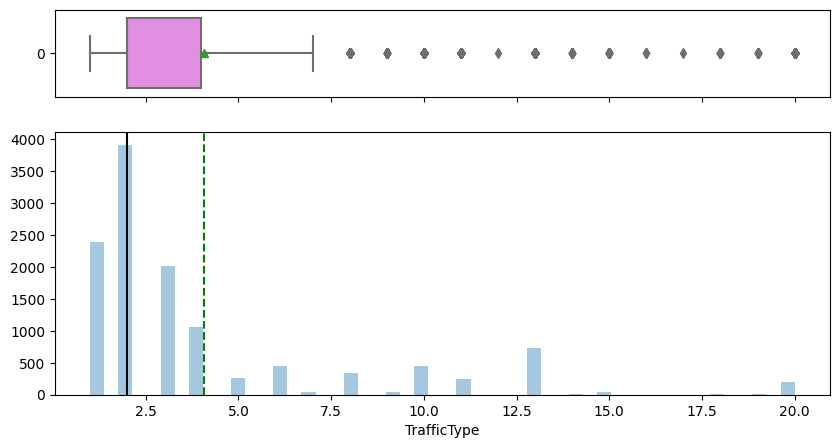

In [32]:
histogram_boxplot(data["TrafficType"])

* The distribution of TrafficTyoes shows most of types of traffic the website gets is '2.
* These values are masked so it is difficult to comment on it.
* The distribution of Traffic also suggests we should look at it as a category to extract more information.

In [33]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

### Observations on Month

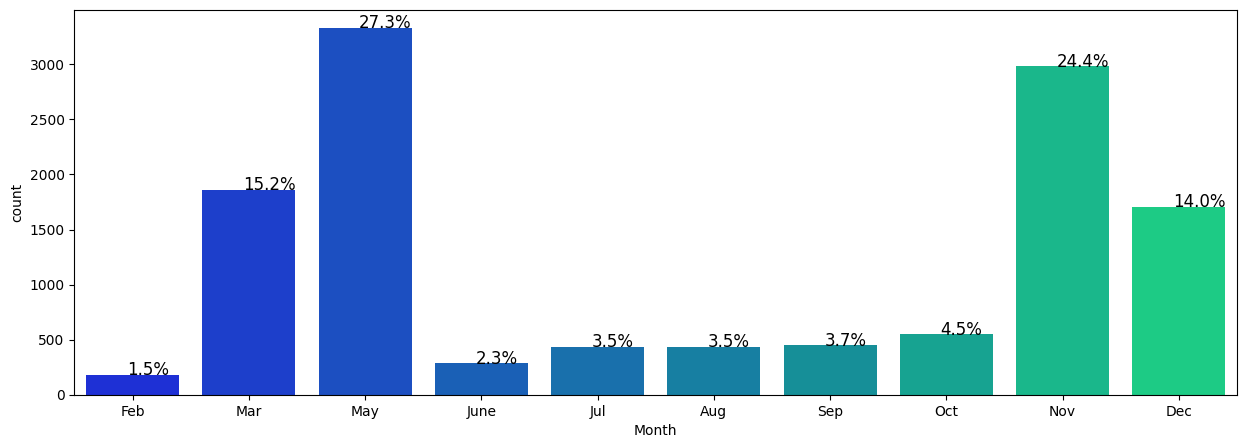

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["Month"],palette='winter',order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
perc_on_bar(ax,data["Month"])

* 27.3% of the users visited the website in the month of May followed by November with 24.4% of traffic.

### Observations on VisitorType

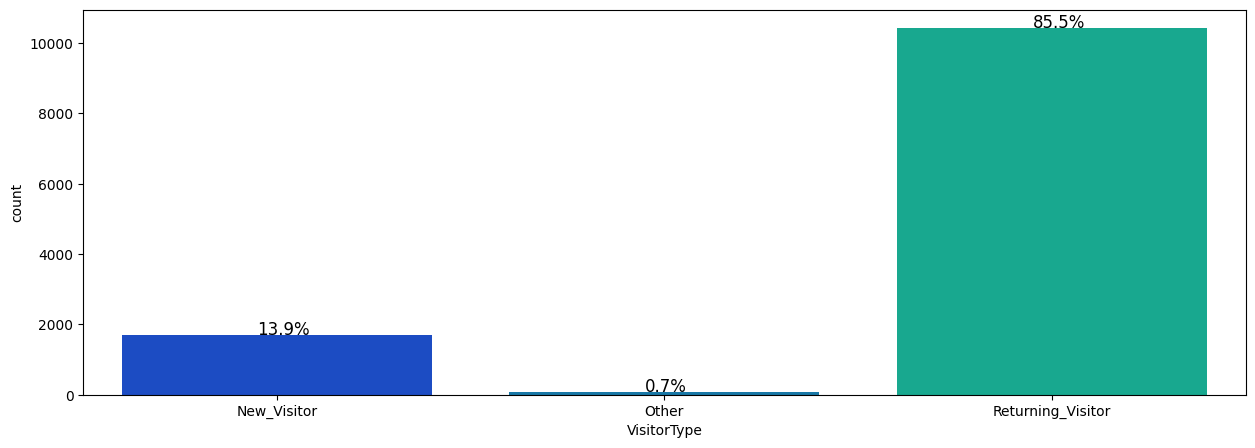

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["VisitorType"],palette='winter')
perc_on_bar(ax,data["VisitorType"])

* 85.5% of the customer are returning customers, indicating the website has a loyal base of customers.
* During these 10 months website also say 13.9% of the customers visiting the website.

### Observations on SpecialDay

In [65]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x = data["SpecialDay"],palette='winter')
perc_on_bar(ax,data["SpecialDay"])

* 89.9% of the website sessions are on Non-Special days.

### Observations on OperatingSystems

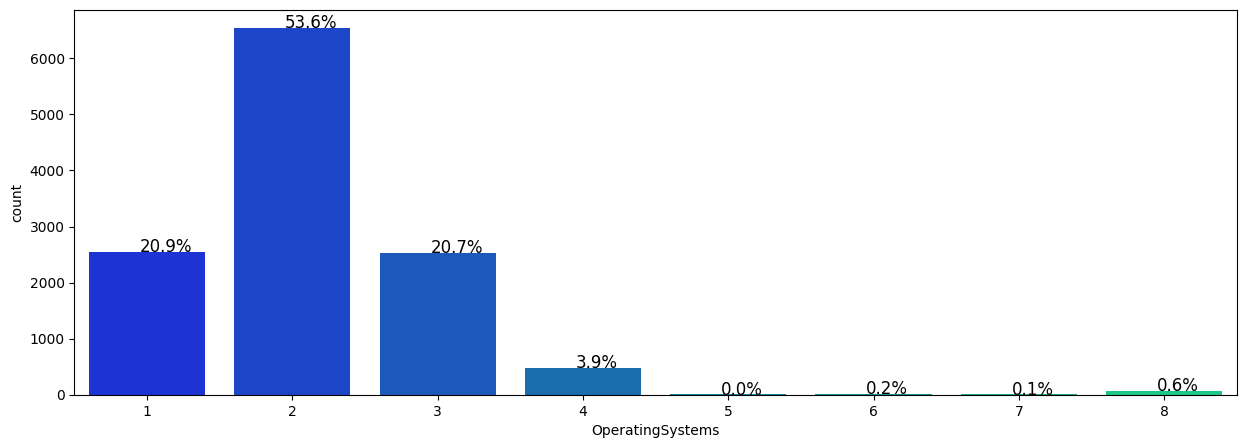

In [66]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x = data["OperatingSystems"],palette='winter')
perc_on_bar(ax,data["OperatingSystems"])

* 53.6% of the customers use '2' operating system.

### Observations on Region

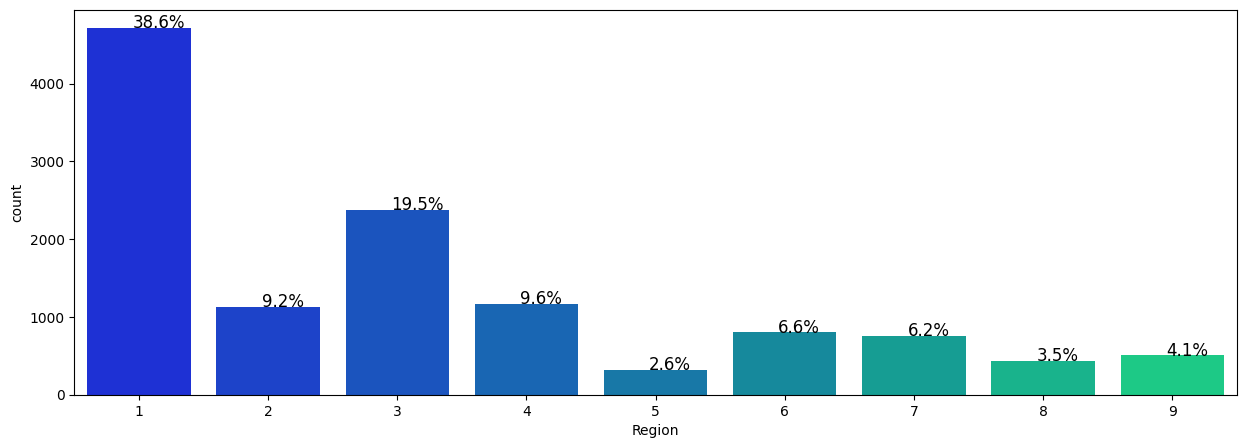

In [68]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x = data["Region"],palette='winter')
perc_on_bar(ax,data["Region"])

* 38.6% of the website sessions are from customers of Region 1.

### Observations on TrafficType

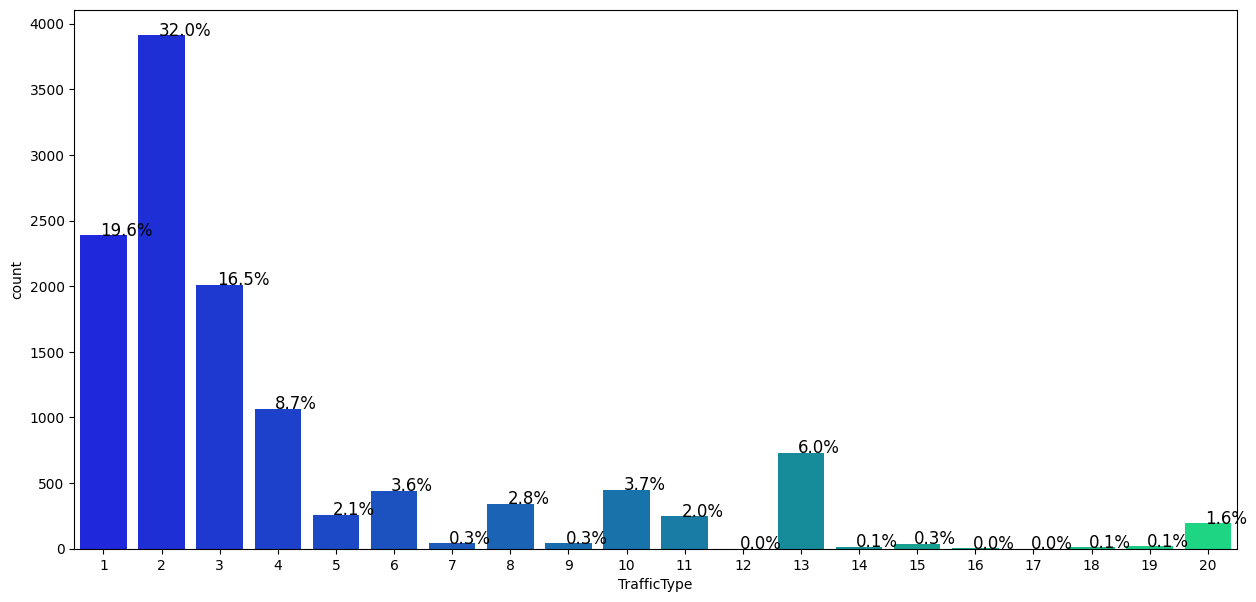

In [69]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = data["TrafficType"],palette='winter')
perc_on_bar(ax,data["TrafficType"])

* 32% of the traffic on website is of type 2.

### Observations on Weekend

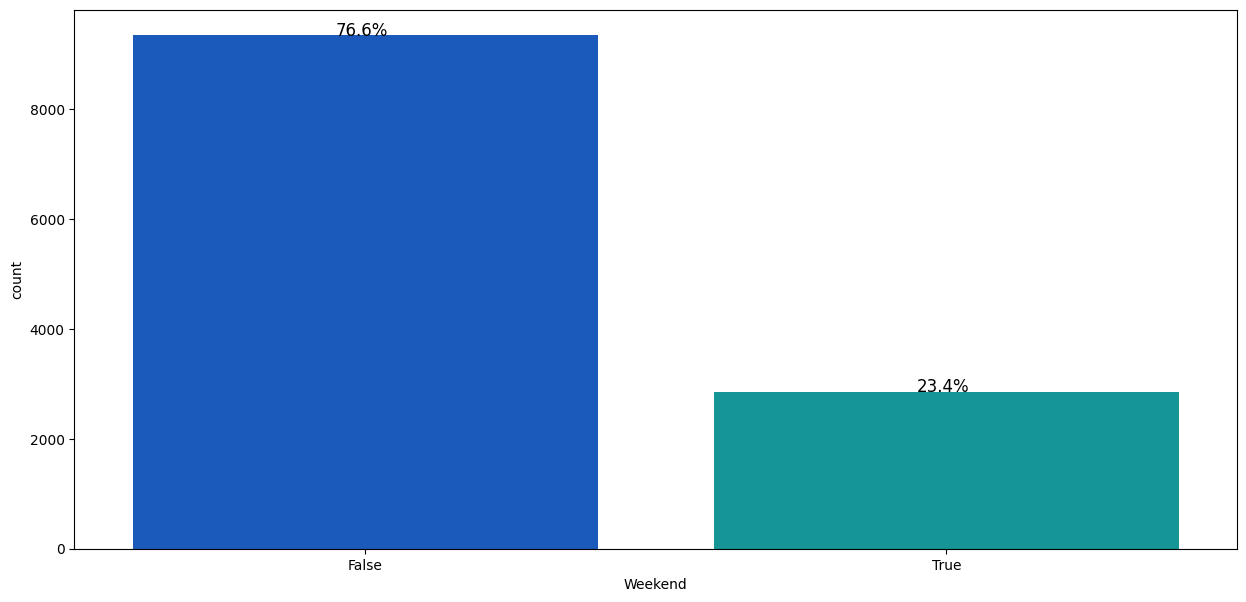

In [70]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = data["Weekend"],palette='winter')
perc_on_bar(ax,data["Weekend"])

* 76.6% of the website sessions are on Non-weekend days.

### Observations on Revenue

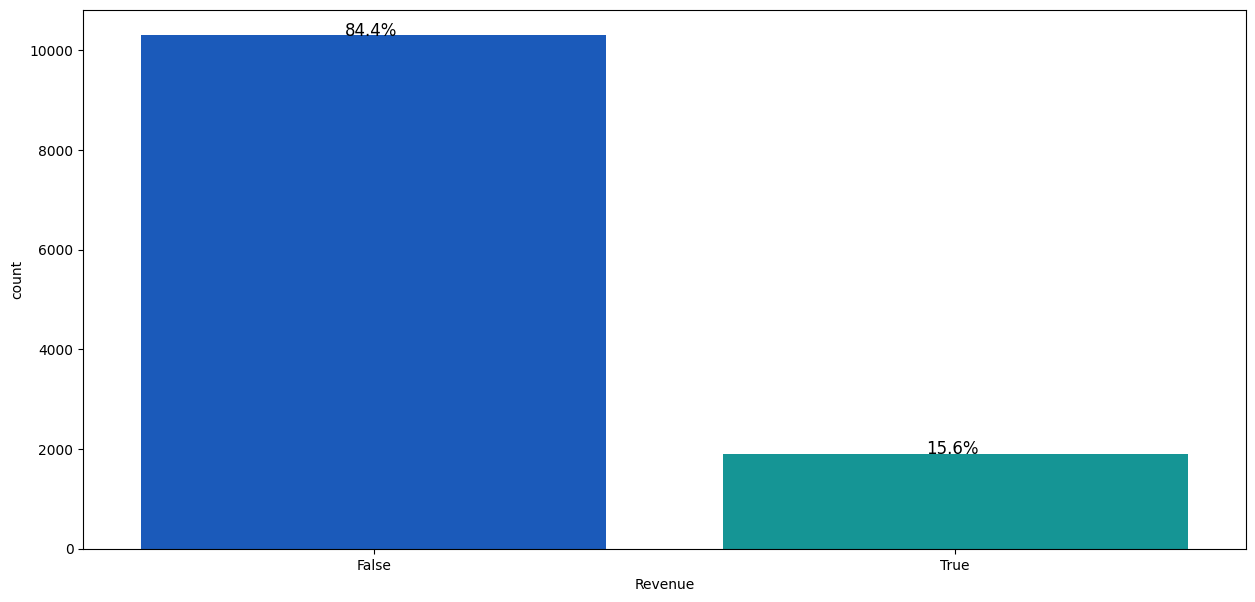

In [71]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = data["Revenue"],palette='winter')
perc_on_bar(ax,data["Revenue"])

* Website is able to generate revenue from only 15.6% of the customers.

### Observations on Administrative

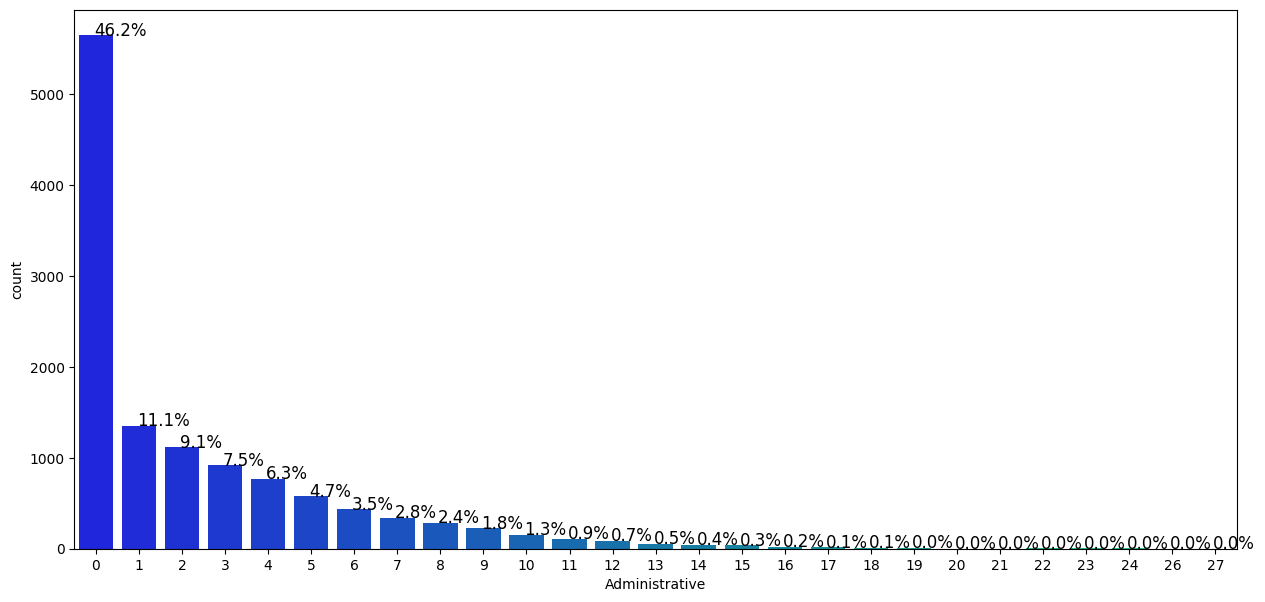

In [72]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = data["Administrative"],palette='winter')
perc_on_bar(ax,data["Administrative"])

* 46.2% of the customers have not visited the administrative page.

### Observations on Informational

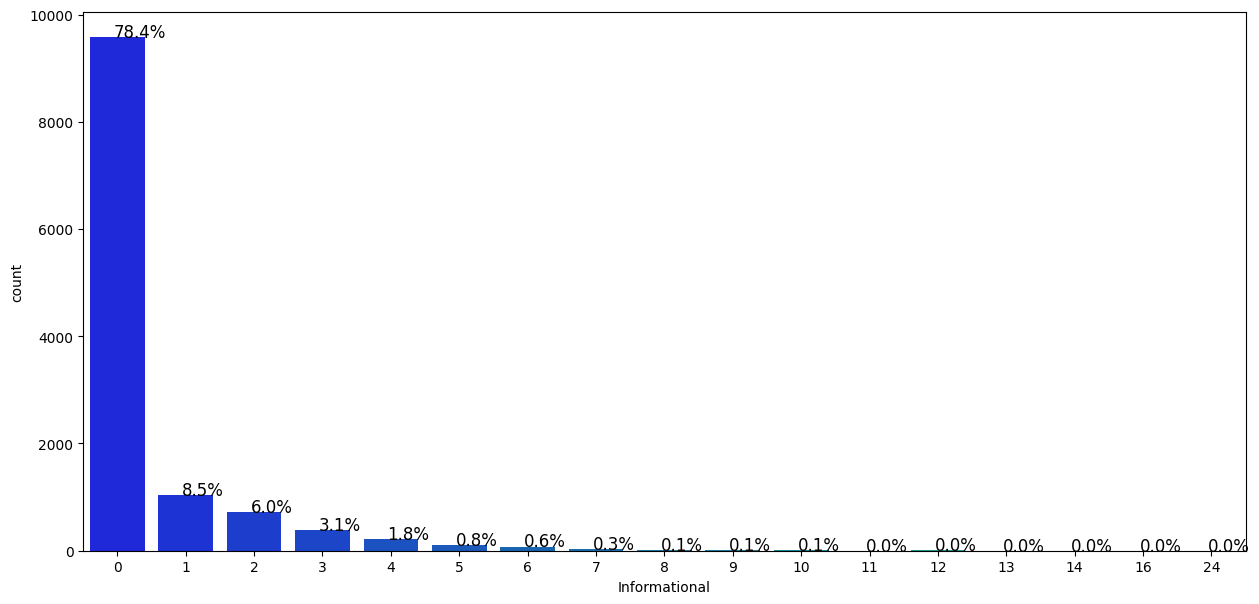

In [73]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = data["Informational"],palette='winter')
perc_on_bar(ax,data["Informational"])

* 78.4% of the customers have not visited the Informational page.

### Observations on ProductRelated

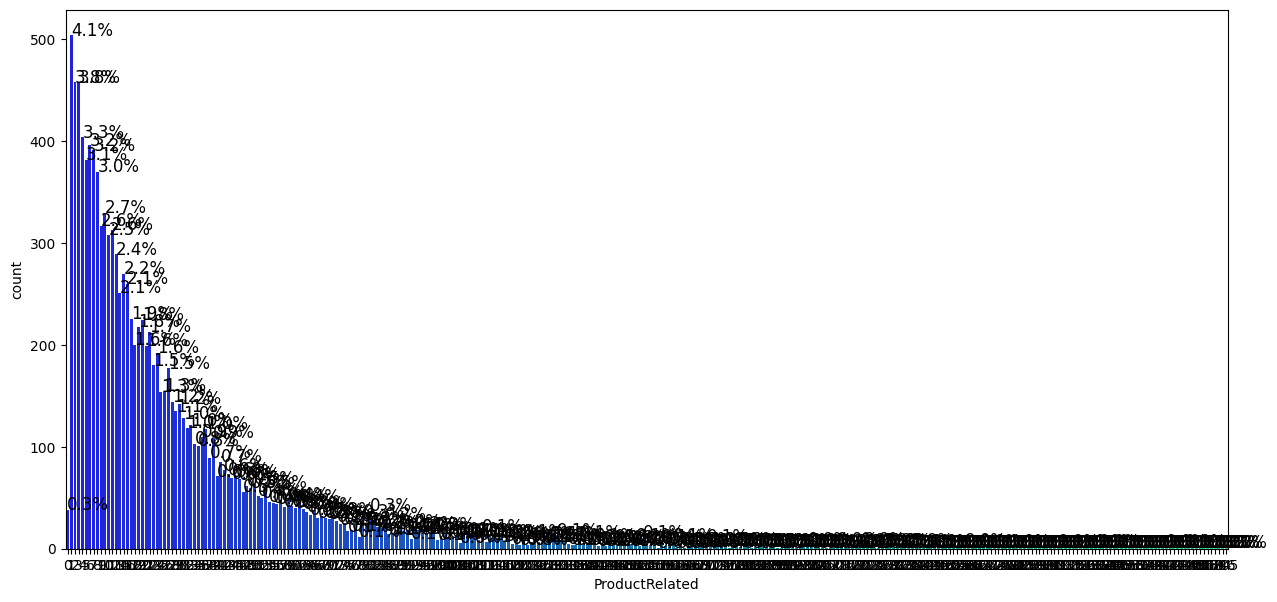

In [74]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = data["ProductRelated"],palette='winter')
perc_on_bar(ax,data["ProductRelated"])

In [45]:
(len(data[data["ProductRelated"]==0]["ProductRelated"])/len(data))*100

0.311347808275297

* Only 0.3% of customers have not visited the product related pages.

## Bivariate Analysis

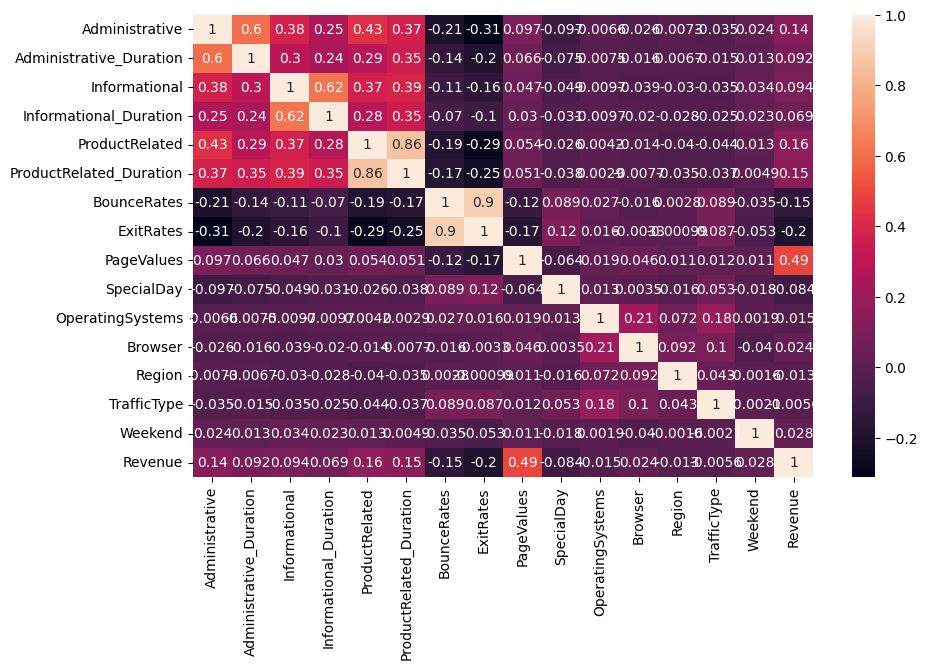

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

* Revenue shows the highest correlation with PageValues (0.49) simply because PageValues takes in account the pages visited before reaching the 'transaction' page.
* Administrative, Informational and ProductRelated pages are correlated with the Administrative, Informational and ProductRelated time durations spent on them which is understandable.
* BounceRates and ExitRates are very highly correlated(0.9) with each other.

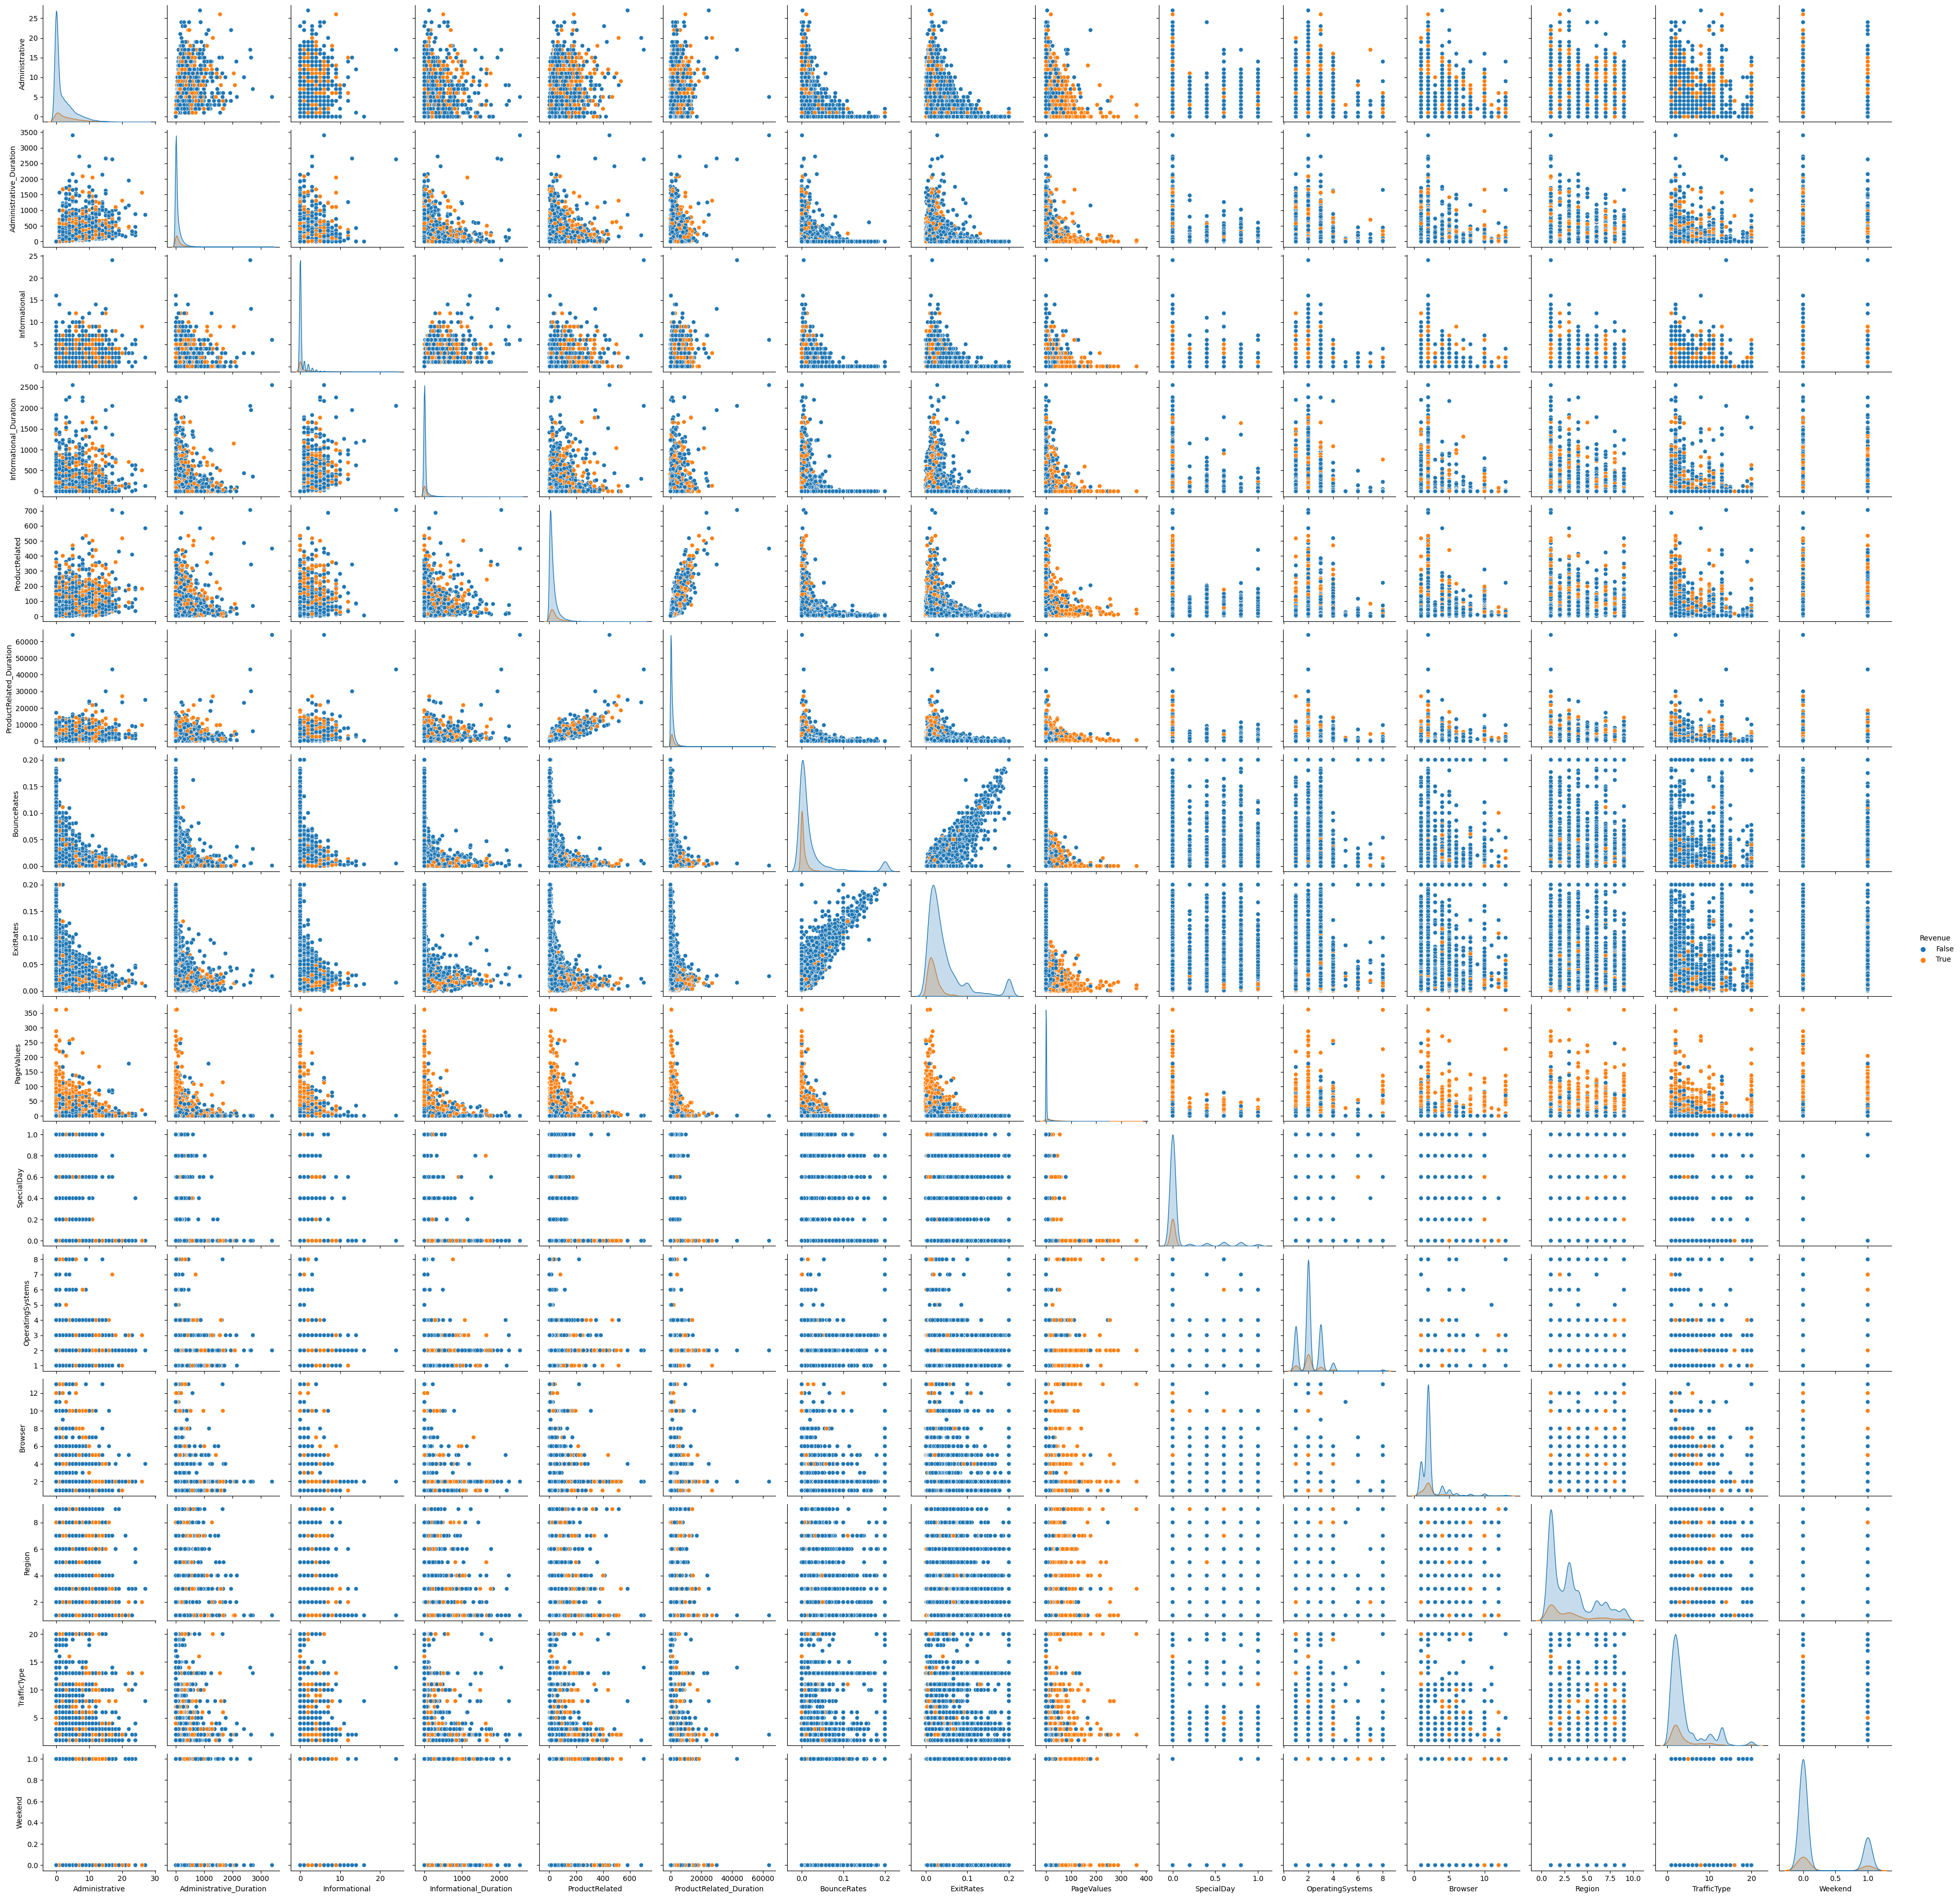

In [47]:
sns.pairplot(data=data,hue="Revenue",)
plt.show()

* We can see varying distributions in variables for revenue, we should investigate it further.

### Revenue vs Administrative, Informational and ProductRelated pages and time spent on these pages

* There is not much difference in weekend and week-day sessions.

### Data Preperation

In [48]:
# page values have the information related to the transaction activity of a customer and would create a bias in model.
# data = data.drop(['PageValues'],axis=1)

In [49]:
dummy_data = pd.get_dummies(data, columns=['Month','VisitorType','Weekend','Region','Browser',
                                           'OperatingSystems','SpecialDay'],drop_first=True)
dummy_data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  TrafficType  ...  OperatingSystems_4  \
0         0.20       0.20         0.0            1  ...                   0   
1         0.00       0.10         0.0            2  ...                   0   
2         0.20       0.20         0.0            3  ...                   1   
3         0.05       0.14         0.0            4  ...                   0   
4         0.02       0.05         0.0            4  ...                   0   

   OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_8  SpecialDay_0.2  SpecialDay_0.4  SpecialDay_0.6  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   

   SpecialDay_0.8  SpecialDay_1.0  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 55 columns]

In [50]:
dummy_data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  TrafficType  ...  OperatingSystems_4  \
0         0.20       0.20         0.0            1  ...                   0   
1         0.00       0.10         0.0            2  ...                   0   
2         0.20       0.20         0.0            3  ...                   1   
3         0.05       0.14         0.0            4  ...                   0   
4         0.02       0.05         0.0            4  ...                   0   

   OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_8  SpecialDay_0.2  SpecialDay_0.4  SpecialDay_0.6  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   

   SpecialDay_0.8  SpecialDay_1.0  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 55 columns]

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build Naive Bayes model
4. Tune the model if required.
5. Test the data on test set.

In [51]:
column_names = list(dummy_data.columns)
column_names.remove('Revenue')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'TrafficType', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_True', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0']


## Split Data

In [52]:
X = dummy_data.drop('Revenue',axis=1)                                                 # Features
y = dummy_data['Revenue'].astype('int64')                                             # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [53]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(8543, 54) (3662, 54)


## Build Naive Bayes Model

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create an instance of the Naive Bayes classifier
classifier = GaussianNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Fit the data to perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new classifier with the best parameters
best_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Fit the new classifier on the training data
best_classifier.fit(X_train, y_train)

# Use the best classifier for predictions
y_pred = best_classifier.predict(X_test)


In [77]:
y_pred  =  best_classifier.predict(X_test)

In [78]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac = accuracy_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)


array([[3074,    0],
       [ 588,    0]])

In [80]:
accuracy_score(y_test,y_pred)*100

83.94320043691972

In [81]:
accuracy_score(y_train,best_classifier.predict(X_train))*100

84.53704787545358